# Part A:

In [1]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import seaborn as sns
import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# visulization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Building the training data

In [2]:
x = []
y = []
value = []
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/100)
    y.append(randY/100)
    if y[i] > 1:
        value.append(1)
    else:
        value.append(-1)

end = {'x': x, 'y': y, 'value': value}
df= pd.DataFrame(data=end,
                columns = ['x', 'y', 'value'])

In [3]:
df.to_csv(r'C:\Users\nechd\Desktop\trainingDF.csv', index = False)


## Building the first test data

In [4]:
x = []
y = []
value = []
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/100)
    y.append(randY/100)
    if y[i] > 1:
        value.append(1)
    else:
        value.append(-1)

end = {'x': x, 'y': y, 'value': value}
df= pd.DataFrame(data=end,
                columns = ['x', 'y', 'value'])

In [5]:
df.to_csv(r'C:\Users\nechd\Desktop\firstTestDF.csv', index = False)

## Building the second test data

In [6]:
x = []
y = []
value = []
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/100)
    y.append(randY/100)
    if y[i] > 1:
        value.append(1)
    else:
        value.append(-1)

end = {'x': x, 'y': y, 'value': value}
df= pd.DataFrame(data=end,
                columns = ['x', 'y', 'value'])

In [7]:
df.to_csv(r'C:\Users\nechd\Desktop\secondTestDF.csv', index = False)

### DataFrames:

In [8]:
train = pd.read_csv(r'C:\Users\nechd\Desktop\trainingDF.csv')
first_test = pd.read_csv(r'C:\Users\nechd\Desktop\firstTestDF.csv')
second_test = pd.read_csv(r'C:\Users\nechd\Desktop\secondTestDF.csv')

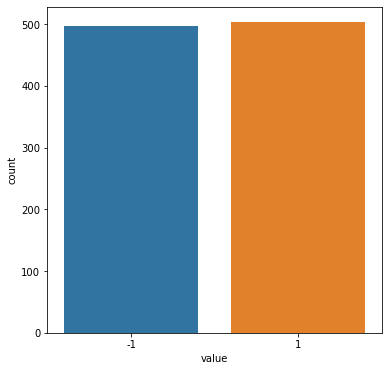

In [9]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = train)

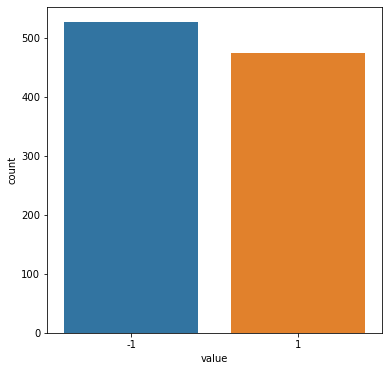

In [10]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = first_test)

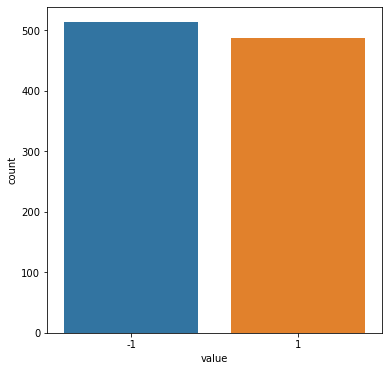

In [11]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = second_test)

## Adaline Algorithm:

In [12]:
def weight_genarate():
    weight = []
    for i in range(2):
        random.seed(i)
        rand = random.uniform(0, 0.01)
        rand=round(rand,4)
        weight.append(rand)
        
    random.seed(4)
    bias = random.uniform(0, 1)
    bias=round(bias,4)
    return weight, bias

In [13]:
# activate 
def activate(x, y, bias, weight):
    return (bias + x*weight[0] + y*weight[1]) 

In [14]:
# error calculation:    
def error_calc(predicted, expected):
    error = (expected - predicted) ** 2
    return error

In [15]:
def adaline_algo(learning_rate, train):
    EPS = 0.0005
    weight, bias = weight_genarate()
#     print(weight, bias)
    
    for index, row in train.iterrows():
        predicted = activate(row['x'], row['y'], bias, weight)
#         print("predicted=",predicted)
        
        # update:
#         print("old weight and bias ", weight, bias)
        weight[0] = round((weight[0] + learning_rate*(row['value'] - predicted)*row['x']),3)
        weight[1] = round((weight[1] + learning_rate*(row['value'] - predicted)*row['y']),3)
        bias = round((bias + learning_rate * (row['value'] - predicted)),3)
        
#         print("new weight and bias ", weight, bias)
        
        # error calc
        error = error_calc(predicted, row['value'])
#         print("error=",error)     
        if error <= EPS or error == 0:
            break
#     print()    
    return weight, bias

In [16]:
# adaline_algo(0.0005, train)

In [17]:
def testing(test):
    weight, bias=adaline_algo(0.0001,train)
    count=0
    for index, row in test.iterrows():
        prediction =activate(row['x'], row['y'], bias, weight) 
        if prediction>=0:
            prediction=1
        else:
            prediction=-1
        if(prediction==row['value']):
            count=count+1
    return(count)

In [18]:
testing(first_test)

858

In [19]:
testing(second_test)

855

In [20]:
x = []
y = []
value = []
random.seed(9)
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/100)
    y.append(randY/100)
    if y[i] > 1:
        value.append(1)
    else:
        value.append(-1)

end = {'x': x, 'y': y, 'value': value}
df2= pd.DataFrame(data=end,columns = ['x', 'y', 'value'])

In [21]:
df2

,x,y,value
0,51.71,22.32,1
1,-12.47,-54.61,-1
2,-39.01,-97.90,-1
3,10.86,64.75,1
4,51.95,98.14,1
...,...,...,...
995,-3.12,2.73,1
996,-65.45,-70.40,-1
997,84.33,37.81,1
998,24.54,24.47,1


In [22]:
testing(df2)

864

In [23]:
def make_df(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX/100)
        y.append(randY/100)
        if y[i] > 1:
            value.append(1)
        else:
            value.append(-1)

    end = {'x': x, 'y': y, 'value': value}
    df= pd.DataFrame(data=end,columns = ['x', 'y', 'value'])
    return df

In [24]:
arr =np.array([])
for i in range(0,100):
    data=make_df(i)
    correct=testing(data)
    correct=correct/1000
    arr=np.append(correct, arr)
print(arr)
max=np.max(arr)
min=np.min(arr)
avg=np.average(arr)
print("min=", min, "max=", max, "avg=", avg)

[0.844 0.865 0.869 0.856 0.858 0.873 0.848 0.861 0.874 0.852 0.839 0.849
 0.84  0.837 0.861 0.856 0.848 0.854 0.842 0.847 0.842 0.851 0.858 0.844
 0.851 0.84  0.85  0.848 0.855 0.849 0.814 0.853 0.874 0.866 0.872 0.872
 0.871 0.837 0.848 0.867 0.868 0.854 0.862 0.842 0.86  0.855 0.862 0.852
 0.847 0.866 0.854 0.855 0.839 0.829 0.86  0.838 0.865 0.857 0.85  0.841
 0.85  0.846 0.849 0.849 0.86  0.849 0.864 0.832 0.843 0.849 0.848 0.854
 0.849 0.871 0.86  0.863 0.849 0.844 0.848 0.842 0.868 0.865 0.856 0.859
 0.836 0.843 0.87  0.845 0.852 0.885 0.864 0.847 0.838 0.86  0.849 0.851
 0.864 0.848 0.856 0.869]
min= 0.814 max= 0.885 avg= 0.8533499999999999


In [25]:
# check what would happen if the points were from -10-10

In [26]:
x = []
y = []
value = []
random.seed(1)
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/1000)
    y.append(randY/1000)
    if y[i] > 1:
        value.append(1)
    else:
        value.append(-1)

    end = {'x': x, 'y': y, 'value': value}
    df= pd.DataFrame(data=end,columns = ['x', 'y', 'value'])
    

In [27]:
df

,x,y,value
0,-5.598,8.651,1
1,-7.933,-1.642,-1
2,-6.137,6.234,1
3,4.728,5.474,1
4,2.439,-3.121,-1
...,...,...,...
995,3.359,-2.411,-1
996,9.918,-8.617,-1
997,-2.111,-2.642,-1
998,-2.022,2.932,1


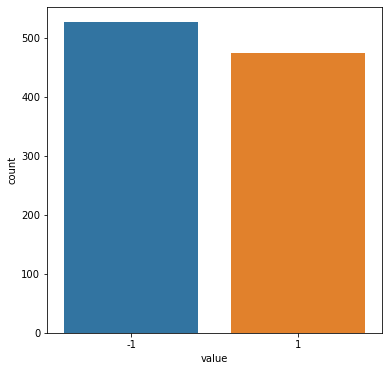

In [28]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = df)

In [29]:
def weight_genarate1():
    weight = []
    for i in range(2):
        random.seed(i)
        rand = random.uniform(0,1)
        rand=round(rand,4)
        weight.append(rand)
        
    random.seed(4)
    bias = random.uniform(0, 1)
    bias=round(bias,4)
    return weight, bias

In [30]:
# activate 
def activate1(x, y, bias, weight):
    return (bias + x*weight[0] + y*weight[1]) 

In [31]:
# error calculation:    
def error_calc1(predicted, expected):
    error = (expected - predicted) ** 2
    return error

In [91]:
def adaline_algo1(learning_rate, train):
    EPS = 0.0000005
    weight, bias = weight_genarate1()
#     print(weight, bias)
    
    for index, row in train.iterrows():
        predicted = activate1(row['x'], row['y'], bias, weight)
#         print("predicted=",predicted)
        
        # update:
#         print("old weight and bias ", weight, bias)
        weight[0] = round((weight[0] + learning_rate*(row['value'] - predicted)*row['x']),3)
        weight[1] = round((weight[1] + learning_rate*(row['value'] - predicted)*row['y']),3)
        bias = round((bias + learning_rate * (row['value'] - predicted)),3)
#         print("new weight and bias ", weight, bias)
        
        # error calc
        error = error_calc1(predicted, row['value'])
#         print("error=",error)     
        if error <= EPS or error == 0:
            break
      
    return weight, bias

In [92]:
adaline_algo1(0.01,df)

([0.033, 0.193], -0.092)

In [122]:
def testing1(test):
    weight, bias=adaline_algo1(0.01,df)
    count=0
    pred=[]
    for index, row in test.iterrows():
        prediction =activate1(row['x'], row['y'], bias, weight) 
        if prediction>=0:
            prediction=1
        else:
            prediction=-1
        pred.append(prediction)
        if(prediction==row['value']):
            count=count+1
    test['predict']=pred
    print(test)
    return(count)

In [123]:
def make_df1(j):
    x = []
    y = []
    value = []
    random.seed(j)
    for i in range(1000):
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX/1000)
        y.append(randY/1000)
        if y[i] > 1:
            value.append(1)
        else:
            value.append(-1)

    end = {'x': x, 'y': y, 'value': value}
    df= pd.DataFrame(data=end,columns = ['x', 'y', 'value'])
    return df

In [124]:
def plotting(test):
#     print(test)
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")
   
   

    for index, row in test.iterrows():
        if row['value']==1:
             ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
    
#              plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
             ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
#              plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
        if row['predict']==1:
             ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
    
#              plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
             ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
#              plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

         x      y  value  predict
0    2.623  3.781      1        1
1   -8.674 -1.516     -1       -1
2    6.753  5.922      1        1
3    3.268 -0.062     -1        1
4    5.617  1.732      1        1
..     ...    ...    ...      ...
995 -4.746  5.355      1        1
996  2.789 -3.852     -1       -1
997  3.483  6.256      1        1
998 -3.707 -4.511     -1       -1
999  2.808 -8.456     -1       -1

[1000 rows x 4 columns]


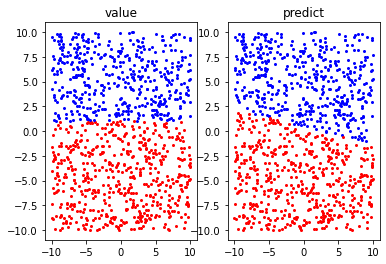

         x      y  value  predict
0   -5.598  8.651      1        1
1   -7.933 -1.642     -1       -1
2   -6.137  6.234      1        1
3    4.728  5.474      1        1
4    2.439 -3.121     -1       -1
..     ...    ...    ...      ...
995  3.359 -2.411     -1       -1
996  9.918 -8.617     -1       -1
997 -2.111 -2.642     -1       -1
998 -2.022  2.932      1        1
999  2.430 -3.114     -1       -1

[1000 rows x 4 columns]


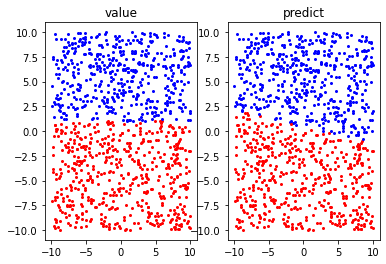

[0.954 0.945]
min= 0.945 max= 0.954 avg= 0.9495


In [125]:
arr =np.array([])
for i in range(0,2):
    data=make_df1(i)
    correct=testing1(data)
    correct=correct/1000
    arr=np.append(correct, arr)
    plotting(data)
print(arr)
max=np.max(arr)
min=np.min(arr)
avg=np.average(arr)
print("min=", min, "max=", max, "avg=", avg)

In [126]:
import math

In [176]:
x = []
y = []
value = []
random.seed(9)
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/100)
    y.append(randY/100)
#     print(math.sqrt(x[i]**2+y[i]**2))
    if 2<= x[i]**2+y[i]**2 <=3:
        value.append(1)
    else:
        value.append(-1)

end = {'x': x, 'y': y, 'value': value}
circle= pd.DataFrame(data=end,columns = ['x', 'y', 'value'])

In [177]:
circle

,x,y,value
0,51.71,22.32,-1
1,-12.47,-54.61,-1
2,-39.01,-97.90,-1
3,10.86,64.75,-1
4,51.95,98.14,-1
...,...,...,...
995,-3.12,2.73,-1
996,-65.45,-70.40,-1
997,84.33,37.81,-1
998,24.54,24.47,-1


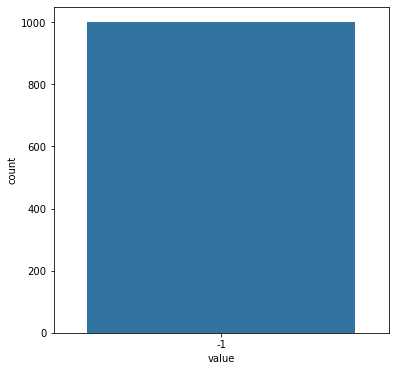

In [178]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = circle)

In [179]:
def testingcir(test):
    weight, bias=adaline_algo1(0.001,circle)
    count=0
    pred=[]
    for index, row in test.iterrows():
        prediction =activate1(row['x'], row['y'], bias, weight) 
        if prediction>=0:
            prediction=1
        else:
            prediction=-1
        pred.append(prediction)
        if(prediction==row['value']):
            count=count+1
    test['predict']=pred
    print(test)
    return(count)

In [180]:
adaline_algo1(0.0001, circle)

([-0.003, -0.024], 0.233)

In [181]:
x = []
y = []
value = []
random.seed(8)
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/100)
    y.append(randY/100)
#     print(math.sqrt(x[i]**2+y[i]**2))
    if 2<= x[i]**2+y[i]**2 <=3:
        value.append(1)
    else:
        value.append(-1)

end = {'x': x, 'y': y, 'value': value}
circle2= pd.DataFrame(data=end,columns = ['x', 'y', 'value'])

In [182]:
testingcir(circle2)

         x      y  value  predict
0   -25.72  21.37     -1       -1
1    23.00 -58.61     -1       -1
2   -36.72 -85.66     -1       -1
3   -72.09 -55.16     -1       -1
4   -18.92  65.92     -1       -1
..     ...    ...    ...      ...
995 -94.29 -98.58     -1       -1
996 -51.01 -51.63     -1       -1
997  76.97 -15.39     -1       -1
998 -94.99 -56.02     -1       -1
999  76.28 -93.08     -1       -1

[1000 rows x 4 columns]


1000

In [183]:
def plotting(test):
    
    print(test)
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")
   
   

    for index, row in test.iterrows():
#         if( -10<=row['x']<=10 and -10<=row['y']<=10):
        if row['value']==1:
             ax[0].plot(row['x'], row['y'], markersize=5, marker="o", color="blue")

#              plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
             ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
#              plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
        if row['predict']==1:
             ax[1].plot(row['x'], row['y'], markersize=5, marker="o", color="blue")

#              plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
             ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
#              plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()
            

         x      y  value  predict
0   -25.72  21.37     -1       -1
1    23.00 -58.61     -1       -1
2   -36.72 -85.66     -1       -1
3   -72.09 -55.16     -1       -1
4   -18.92  65.92     -1       -1
..     ...    ...    ...      ...
995 -94.29 -98.58     -1       -1
996 -51.01 -51.63     -1       -1
997  76.97 -15.39     -1       -1
998 -94.99 -56.02     -1       -1
999  76.28 -93.08     -1       -1

[1000 rows x 4 columns]


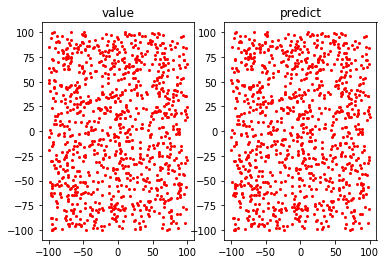

In [184]:
plotting(circle2)